# 1. Prediction of Temperature in Szeged, Hungary
## Name : Preethu Nath Manjunath

# 2. Introduction:

The dataset provides a comprehensive hourly/daily summary of weather conditions in Szeged, Hungary, spanning the years 2006 to 2016. The information includes various meteorological parameters such as temperature, apparent temperature, humidity, wind speed, and more. The primary goal of this project is to leverage the dataset to predict temperature based on other meteorological attributes. Additionally, the project aims to explore and compare real historical weather data with weather folklore, providing valuable insights into the accuracy and reliability of traditional weather knowledge.

## Objectives/Research Hypotheses:
### 1. Temperature Prediction:
 - Objective: Develop a robust predictive model for temperature using the provided meteorological attributes.
 - Hypothesis: The temperature can be accurately predicted using a combination of variables such as humidity, wind speed, and atmospheric pressure.
### 2. Generalizability of temperature prediction model:

 - Objective: Evaluate the robustness and generalizability of the temperature prediction model.
 - Hypothesis: The developed temperature prediction model will demonstrate consistent and accurate performance across different subsets of the dataset.

### 3. Impact of Atmospheric Conditions:

 - Objective: Investigate the impact of atmospheric conditions (e.g., wind speed, humidity) on temperature fluctuations.
 - Hypothesis: Certain atmospheric conditions may have a significant influence on temperature variations, and identifying these relationships can enhance our understanding of local weather patterns.

## Significance of the Project
This project holds significant importance as it strives to enhance weather prediction models in Szeged, Hungary, without relying on traditional weather folklore. The development of a robust predictive model for temperature, based on meteorological attributes, contributes to the advancement of empirical forecasting techniques. The exploration of temporal patterns and trends over the years adds depth to our understanding of local climate dynamics, shedding light on recurring cycles and abrupt changes. Additionally, the investigation into the impact of external factors and the analysis of multivariate relationships among meteorological attributes provide valuable insights into nuanced interactions within the weather system. The project's local relevance is crucial, offering tailored weather predictions for Szeged that directly inform decision-making in sectors like agriculture, transportation, and emergency management. Overall, this project serves not only as a scientific endeavor but also as a practical resource with implications for the local community, industries, and educational initiatives, without relying on traditional weather folklore.

## Background:
Weather folklore, often rooted in traditional knowledge passed down through generations, has been a longstanding method of predicting weather conditions. However, the reliability of such folklore in comparison to empirical weather data remains a subject of interest and investigation. With advancements in meteorological data collection and analysis, there is an opportunity to assess the accuracy of historical weather folklore in predicting temperature and other weather phenomena.

Szeged, Hungary, with its rich historical and cultural background, provides an excellent context for such a study. By combining real historical weather data with traditional weather knowledge, this project seeks to bridge the gap between anecdotal wisdom and scientific understanding. The findings could not only contribute to improved local weather predictions but also shed light on the broader discussion of the intersection between traditional knowledge and modern meteorology.

# 3. Data Description

## Data Description:

Data Description:
The dataset used in this project provides a detailed hourly/daily summary of weather conditions in Szeged, Hungary, spanning the years 2006 to 2016. Each entry includes a timestamp ('time') corresponding to the observation, and various meteorological attributes that capture different aspects of the weather.


### Variables:

 - **time**: The timestamp indicating the date and time of the observation.
 - **summary**: A brief summary of the weather conditions at the given time.
 - **precipType**: The type of precipitation, if any, such as rain or snow.
 - **temperature**: The temperature in degrees Celsius.
 - **apparentTemperature**: The apparent temperature, which considers factors like wind chill.
 - **humidity**: The relative humidity as a percentage.
 - **windSpeed**: The wind speed in meters per second.
 - **windBearing**: The direction of the wind in degrees.
 - **visibility**: The visibility in kilometers.
 - **loudCover**: A numerical value indicating the extent of cloud cover.
 - **pressure**: The atmospheric pressure in hectopascals.

This dataset provides a comprehensive view of meteorological conditions over a significant timeframe, allowing for the exploration of  - temporal patterns, trends, and the development of a predictive model for temperature. The absence of external factors or traditional weather folklore ensures a focused analysis solely on empirical data. The dataset facilitates research into the dynamic interplay of various meteorological attributes and their impact on weather conditions in Szeged.

## Data Preprocessing

Demonstrate ability to handle data preprocessing tasks

Handling missing values, outliers, and any other data quality issues.
Transforming variables if necessary (e.g., cleaning, normalization, encoding categorical variables).
Building a common dataset (may apply the dataset to the selected regression models).
Performing exploratory data analysis (EDA) to gain insights into the dataset characteristics.
Finding correlations, visualizing the data using different plots and charts, etc. that used in class

In [ ]:
#Importing necessary libraries
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KAGGLE_USERNAME'] = 'preethunath'
os.environ['KAGGLE_KEY'] = '3ab4f9a111135e04da6184bb345f0ee3'
import warnings
warnings.filterwarnings("ignore")


In [ ]:
api = KaggleApi()
api.authenticate()
datasets = api.dataset_list(search='Weather in Szeged 2006-2016')
for i, dataset in enumerate(datasets[:5]):  # Limiting to 5 datasets for example
    print(f"Downloading dataset {i+1}: {dataset.title} by {dataset.ownerName}")
    api.dataset_download_files(dataset.ref, path=f'dataset_{i+1}', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/budincsevity/szeged-weather


In [ ]:
def load_dataset(path):
    if path.endswith('.csv'):
        for encoding in ['utf-8', 'ISO-8859-1', 'latin1']:
            try:
                return pd.read_csv(path, encoding=encoding)
            except UnicodeDecodeError:
                print(f"UnicodeDecodeError: trying next encoding for file {path}")
    elif path.endswith('.json'):
        return pd.read_json(path)
    elif path.endswith('.xlsx'):
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unsupported file type for {path}")

df = pd.DataFrame()

In [ ]:
for i in range(1, 2):  # Assuming we have 3 datasets
    dataset_path = f'dataset_{i}'
    for filename in os.listdir(dataset_path):
        if filename.endswith(('.csv', '.json', '.xlsx')):
            print(f"Processing file: {filename}")
            data = load_dataset(os.path.join(dataset_path, filename))
            data.drop_duplicates(inplace=True)
            data.fillna(method='ffill', inplace=True)
            df = pd.concat([df, data], ignore_index=True)



Processing file: weatherHistory.csv


In [ ]:
df.shape

(96429, 12)

### Missing Values

In [ ]:
nan_rows = df[df['Precip Type'].isna()].index
nan_rows

Index([], dtype='int64')

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
# we fill missing values of precip type with mode of the variable
df['Precip Type'].value_counts()

,count
Precip Type,
rain,85717
snow,10712


In [ ]:
df['Precip Type'] = df['Precip Type'].fillna('rain')

In [ ]:
df['Precip Type'].value_counts()

,count
Precip Type,
rain,85717
snow,10712


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


### Handling Outliers

In [ ]:
df['Loud Cover'].value_counts()

,count
Loud Cover,
0.0,96429


In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
numeric_columns = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']

cat_columns = ['Summary','Precip Type','Daily Summary']

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("pastel")
sns.set_style("whitegrid")

def plot_box(numeric_columns):
    num_cols = len(numeric_columns)
    rows = (num_cols + 1) // 2
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 4 * rows))

    outliers_count = {}

    for i, column in enumerate(numeric_columns):
        row_num = i // 2
        col_num = i % 2

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_count[column] = len(outliers)

        sns.boxplot(x=df[column], ax=axes[row_num, col_num])
        axes[row_num, col_num].set_title(f'Box Plot - {column}')

    for i in range(num_cols, rows * 2):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()
    return outliers_count

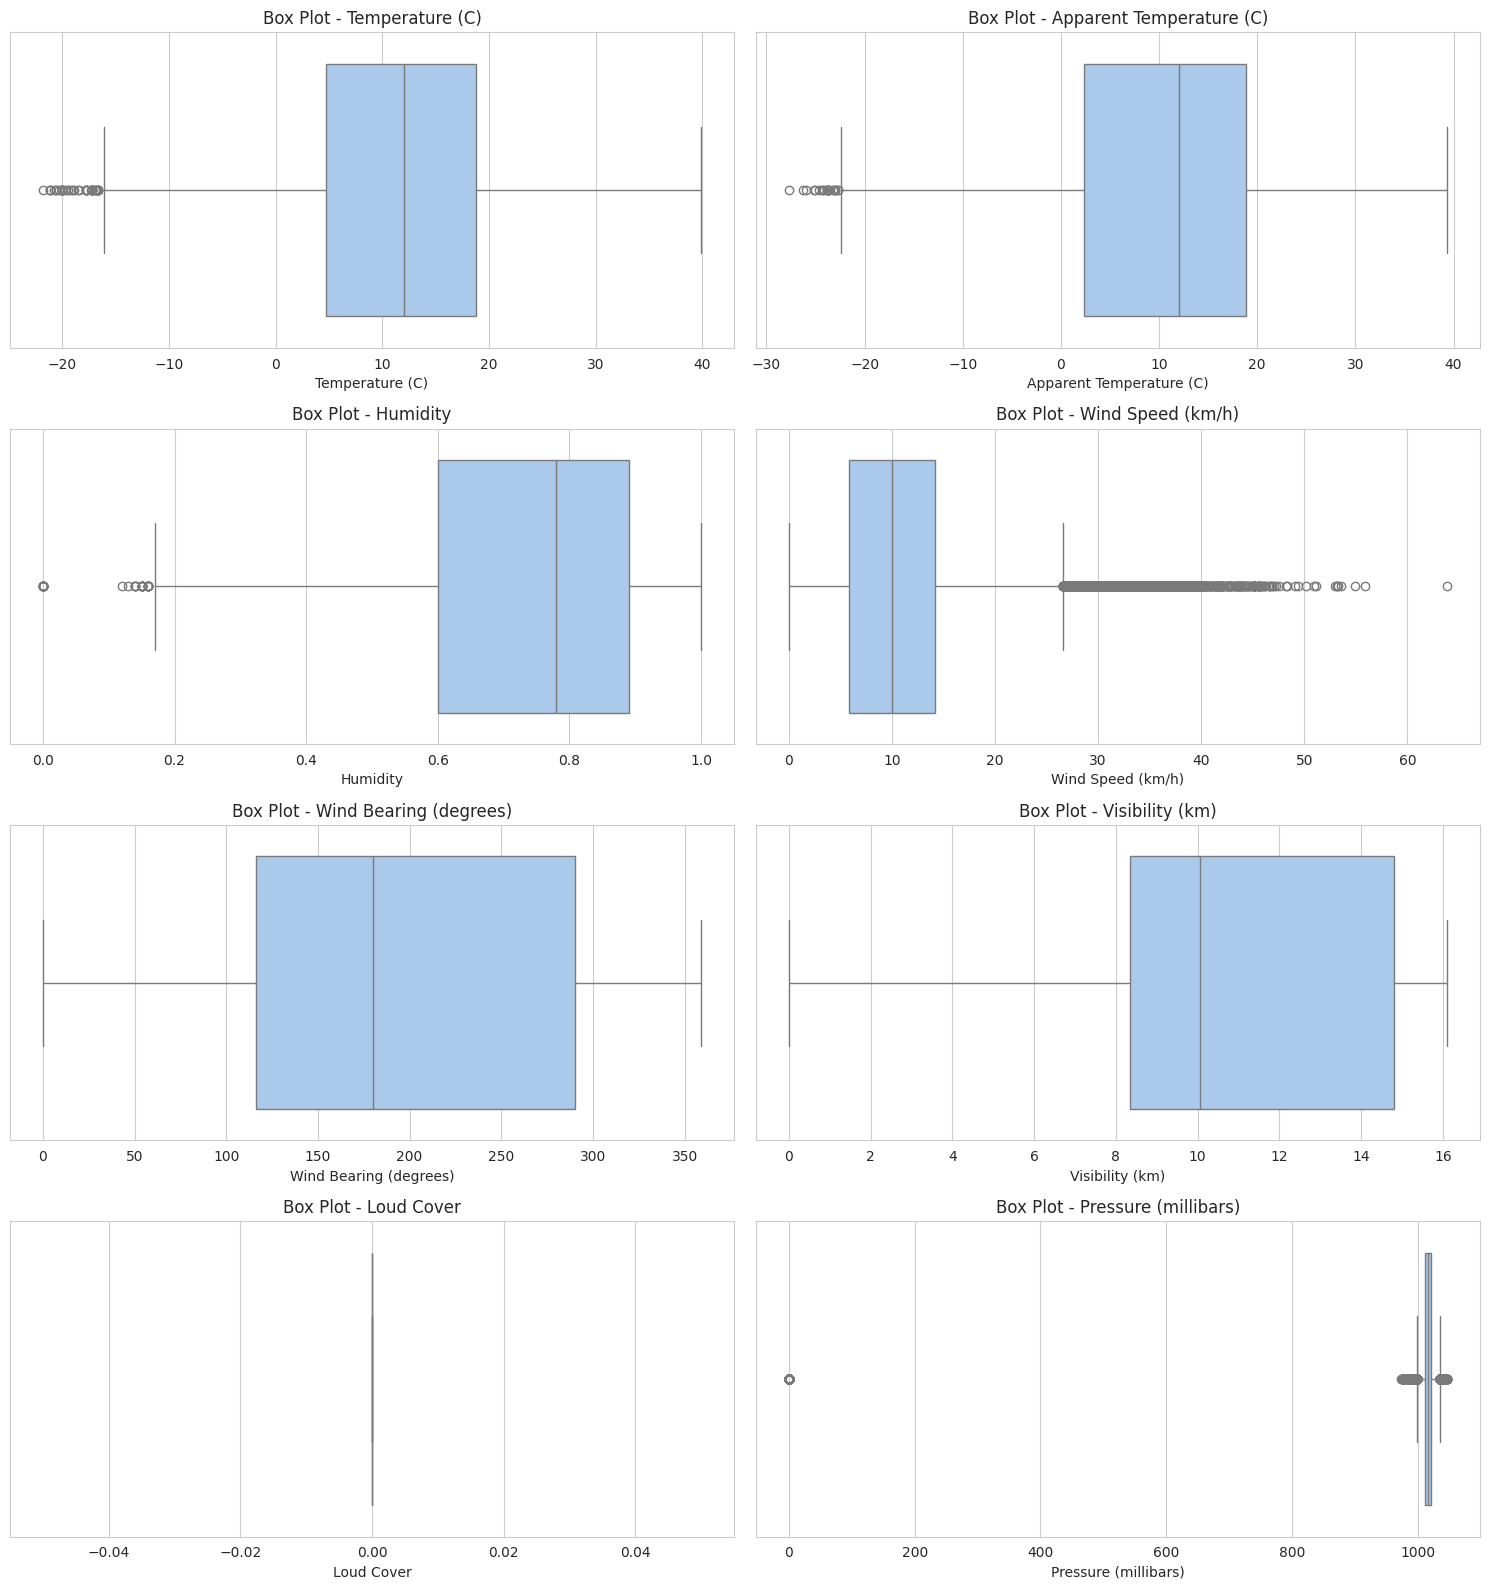

In [ ]:
outliers_count = plot_box(numeric_columns)

In [ ]:
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in Temperature (C): 44
Number of outliers in Apparent Temperature (C): 22
Number of outliers in Humidity: 46
Number of outliers in Wind Speed (km/h): 3028
Number of outliers in Wind Bearing (degrees): 0
Number of outliers in Visibility (km): 0
Number of outliers in Loud Cover: 0
Number of outliers in Pressure (millibars): 4400


So we can see that there are many outliers in columns like pressure, wind speed, both temperature, and humidity so we deal with the by replacing them with corresponding upper and lower bound and also we remove the column loud cover since it only has 0 in it so lets do it

In [ ]:
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

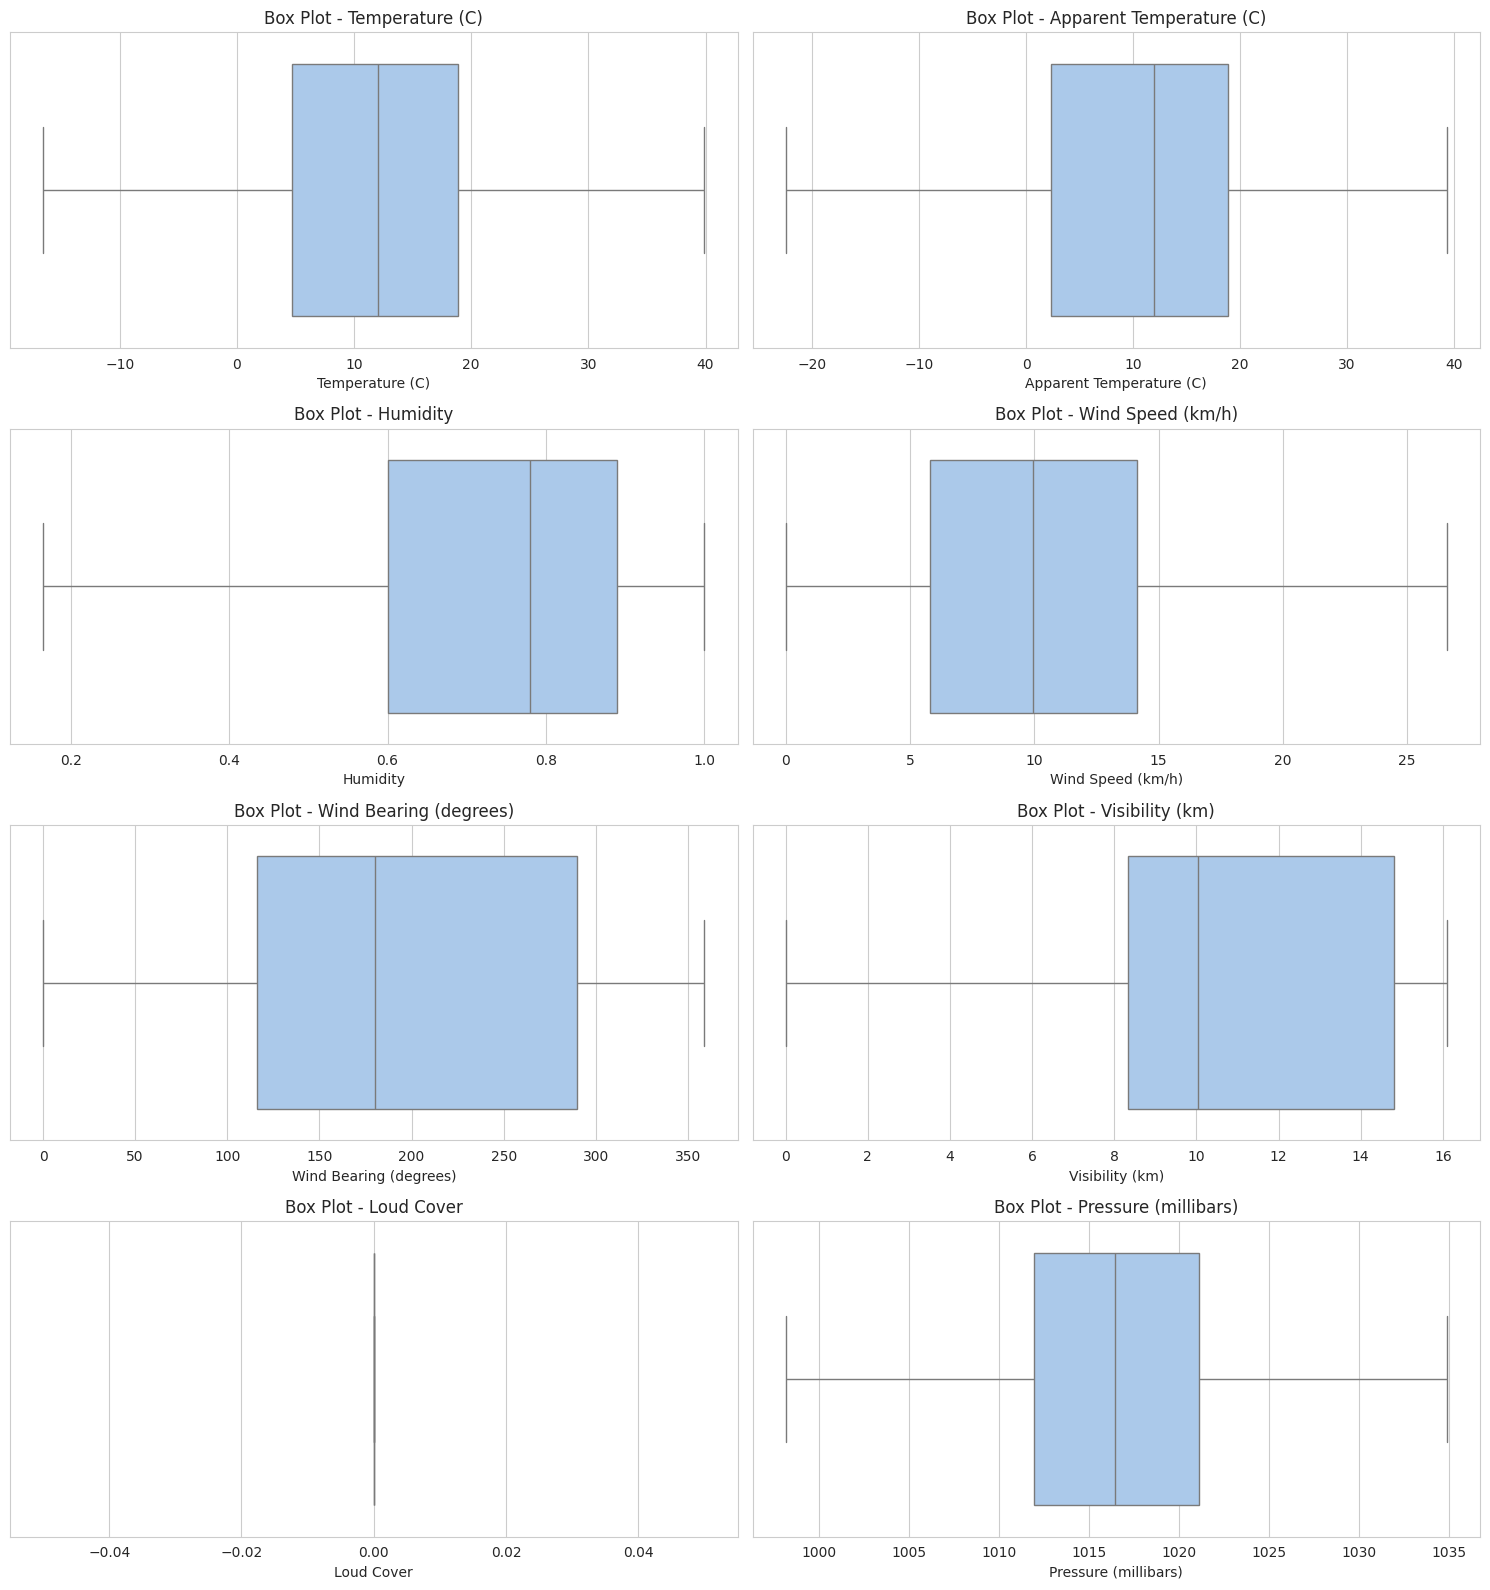

In [ ]:
outliers_count = plot_box(numeric_columns)

In [ ]:
for column, count in outliers_count.items():
    print(f'Number of outliers after removing outliers in {column}: {count}')

Number of outliers after removing outliers in Temperature (C): 0
Number of outliers after removing outliers in Apparent Temperature (C): 0
Number of outliers after removing outliers in Humidity: 0
Number of outliers after removing outliers in Wind Speed (km/h): 0
Number of outliers after removing outliers in Wind Bearing (degrees): 0
Number of outliers after removing outliers in Visibility (km): 0
Number of outliers after removing outliers in Loud Cover: 0
Number of outliers after removing outliers in Pressure (millibars): 0


You can see that now there are no outliers

### Other Data Issues

In [ ]:
df[numeric_columns].corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992644,-0.633447,0.015704,0.029895,0.392857,NaN,-0.295996
Apparent Temperature (C),0.992644,1.000000,-0.603616,-0.050575,0.028915,0.381784,NaN,-0.274247
Humidity,-0.633447,-0.603616,1.000000,-0.230696,0.000546,-0.369710,NaN,0.039709
Wind Speed (km/h),0.015704,-0.050575,-0.230696,1.000000,0.100117,0.105190,NaN,-0.247485
Wind Bearing (degrees),0.029895,0.028915,0.000546,0.100117,1.000000,0.047582,NaN,-0.079059
Visibility (km),0.392857,0.381784,-0.369710,0.105190,0.047582,1.000000,NaN,-0.139728
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.295996,-0.274247,0.039709,-0.247485,-0.079059,-0.139728,NaN,1.000000


we plan to remove Temperature column since its highly correlated with apparent temperature and we only need to predict one and in real time we won't be provied with both the columns

In [ ]:
df['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31726
Mostly Cloudy,28094
Overcast,16597
Clear,10873
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


you can see that there are many categories which might lead to improper prediction so we aim to combine similar categories to reduce the number of categories to 5
- Cloudy
- Clear
- Foggy
- Windy
- Rainy

In [ ]:
categories_to_group = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Clear': 'Clear',
    'Foggy': 'Foggy',
    'Breezy and Overcast': 'Windy',
    'Breezy and Mostly Cloudy': 'Windy',
    'Breezy and Partly Cloudy': 'Windy',
    'Dry and Partly Cloudy': 'Windy',
    'Windy and Partly Cloudy': 'Windy',
    'Light Rain': 'Rainy',
    'Breezy': 'Windy',
    'Windy and Overcast': 'Windy',
    'Humid and Mostly Cloudy': 'Cloudy',
    'Drizzle': 'Rainy',
    'Breezy and Foggy': 'Foggy',
    'Windy and Mostly Cloudy': 'Windy',
    'Dry': 'Clear',
    'Humid and Partly Cloudy': 'Cloudy',
    'Dry and Mostly Cloudy': 'Cloudy',
    'Rain': 'Rainy',
    'Windy': 'Windy',
    'Humid and Overcast': 'Cloudy',
    'Windy and Foggy': 'Foggy',
    'Windy and Dry': 'Windy',
    'Dangerously Windy and Partly Cloudy': 'Windy',
    'Breezy and Dry': 'Windy',
}

In [ ]:
df['Summary'] = df['Summary'].map(categories_to_group).fillna('Other')

In [ ]:
df['Summary'].value_counts()

,count
Summary,
Cloudy,76495
Clear,10907
Foggy,7187
Windy,1728
Rainy,112


Now you can see we have only 5 categories

In [ ]:
df['Daily Summary'].value_counts()

,count
Daily Summary,
Mostly cloudy throughout the day.,20085
Partly cloudy throughout the day.,9981
Partly cloudy until night.,6169
Partly cloudy starting in the morning.,5184
Foggy in the morning.,4201
...,...
Breezy starting overnight continuing until morning and foggy overnight.,24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.,24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.,24


The daily summary has 214 categories which is very tough to combine manually so we drop the column

In [ ]:
#updated numeric and categorical columns after above analysis
numeric_columns = [
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

cat_columns = ['Summary','Precip Type']

### Transforming Variables

In [ ]:
#lets transform categorical variables first
cat_columns

['Summary', 'Precip Type']

In [ ]:
cat_df = df[cat_columns].copy()

In [ ]:
cat_df_encoded = pd.get_dummies(cat_df, prefix='', prefix_sep='')

cat_df_encoded.head()

,Clear,Cloudy,Foggy,Rainy,Windy,rain,snow
0,False,True,False,False,False,True,False
1,False,True,False,False,False,True,False
2,False,True,False,False,False,True,False
3,False,True,False,False,False,True,False
4,False,True,False,False,False,True,False


In practice if we have n encoded columns for a categorical column those n columns are dependent on each other because knowing n-1 columns will tell you whats the nth colum is so its better to drop one

In [ ]:
df['Precip Type'].value_counts()

,count
Precip Type,
rain,85717
snow,10712


In [ ]:
df['Summary'].value_counts()

,count
Summary,
Cloudy,76495
Clear,10907
Foggy,7187
Windy,1728
Rainy,112


In [ ]:
cat_df = df[cat_columns].copy()

In [ ]:
cat_df_encoded.drop(labels=['Cloudy','rain'],axis=1, inplace=True)

In [ ]:
cat_df_encoded.head()

,Clear,Foggy,Rainy,Windy,snow
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
#now lets transform numeric variables

In [ ]:
df[numeric_columns].head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
#We should not disturb the output column so lets store it in Y and drop it
Y = df['Apparent Temperature (C)'].copy()

In [ ]:
numeric_columns = ['Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [ ]:
num_df = df[numeric_columns].copy()

In [ ]:
num_df.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.89,14.1197,251.0,15.8263,1015.13
1,0.86,14.2646,259.0,15.8263,1015.63
2,0.89,3.9284,204.0,14.9569,1015.94
3,0.83,14.1036,269.0,15.8263,1016.41
4,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'numeric_columns' is the array of column names
scaler = StandardScaler()

# Fit and transform the numeric columns
num_df = scaler.fit_transform(num_df)


In [ ]:
num_df = pd.DataFrame(num_df, columns=numeric_columns)

In [ ]:
num_df.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.793828,0.537176,0.591404,1.306867,-0.184936
1,0.640240,0.559665,0.665908,1.306867,-0.120218
2,0.793828,-1.044564,0.153689,1.099498,-0.080093
3,0.486652,0.534677,0.759039,1.306867,-0.019259
4,0.486652,0.059905,0.665908,1.306867,-0.006316


In [ ]:
#combining categorical and numeric df to obtain train_df
train_df = pd.concat([num_df, cat_df_encoded], axis=1)

In [ ]:
train_df.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Foggy,Rainy,Windy,snow
0,0.793828,0.537176,0.591404,1.306867,-0.184936,False,False,False,False,False
1,0.640240,0.559665,0.665908,1.306867,-0.120218,False,False,False,False,False
2,0.793828,-1.044564,0.153689,1.099498,-0.080093,False,False,False,False,False
3,0.486652,0.534677,0.759039,1.306867,-0.019259,False,False,False,False,False
4,0.486652,0.059905,0.665908,1.306867,-0.006316,False,False,False,False,False


In [ ]:
train_df.shape

(96429, 10)

### Distance

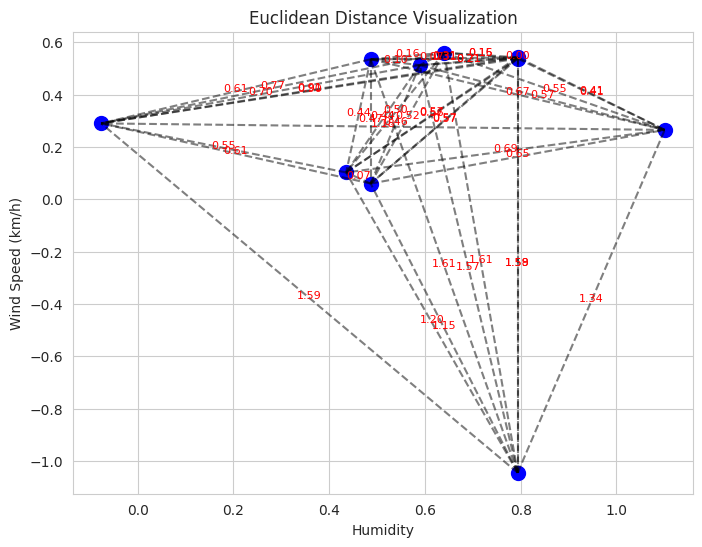

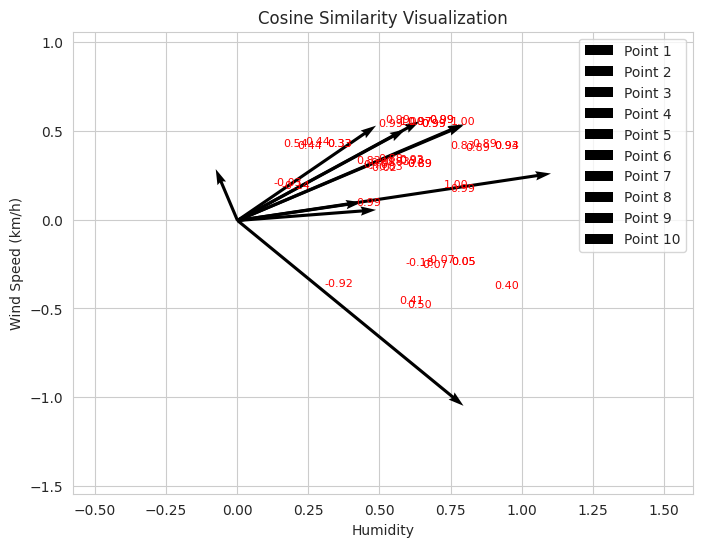

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

selected_columns = ['Humidity', 'Wind Speed (km/h)']
points = train_df[selected_columns].values[:10]  # Visualize only the first 10 points for clarity

# Euclidean Distance Visualization
def visualize_euclidean(points, feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue', s=100, label='Points')  # Larger point size

    # Compute and display pairwise distances
    for (i, j) in combinations(range(len(points)), 2):
        p1, p2 = points[i], points[j]
        dist = euclidean(p1, p2)
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k--', alpha=0.5)
        mid_point = (p1 + p2) / 2
        plt.text(mid_point[0], mid_point[1], f'{dist:.2f}', color='red', fontsize=8, ha='center')

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Euclidean Distance Visualization')
    plt.grid(True)
    plt.show()

# Cosine Similarity Visualization
def visualize_cosine_similarity(points, feature_names):
    cos_sim = cosine_similarity(points)

    plt.figure(figsize=(8, 6))

    for i, vec in enumerate(points):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, width=0.005, label=f'Point {i+1}')


    for i, j in combinations(range(len(points)), 2):
        mid_point = (points[i] + points[j]) / 2
        similarity = cos_sim[i, j]
        plt.text(mid_point[0], mid_point[1], f'{similarity:.2f}', color='red', fontsize=8, ha='center')

    plt.xlim(min(points[:,0]) - 0.5, max(points[:,0]) + 0.5)
    plt.ylim(min(points[:,1]) - 0.5, max(points[:,1]) + 0.5)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Cosine Similarity Visualization')
    plt.grid(True)
    plt.legend()
    plt.show()


visualize_euclidean(points, selected_columns)
visualize_cosine_similarity(points, selected_columns)


In [ ]:
# Before Transformation
print("Before Transformation:")
display(df.head())

# After Transformation
print("After Transformation:")
display(cat_df_encoded.head())


Before Transformation:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


After Transformation:


,Clear,Foggy,Rainy,Windy,snow
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


### ARM

In [ ]:
print(df[['Humidity', 'Apparent Temperature (C)', 'Wind Speed (km/h)']].head())

   Humidity  Apparent Temperature (C)  Wind Speed (km/h)
0      0.89                  7.388889            14.1197
1      0.86                  7.227778            14.2646
2      0.89                  9.377778             3.9284
3      0.83                  5.944444            14.1036
4      0.83                  6.977778            11.0446


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx


# 2. Data Preparation: Binarize/Discretize Numerical Variables for ARM
# For simplicity, we binarize three weather conditions: Humidity, Temperature, Wind Speed
df['High_Humidity'] = df['Humidity'].apply(lambda x: 1 if x > 0.8 else 0)  # Assuming Humidity is in range [0, 1]
df['Low_Temperature'] = df['Apparent Temperature (C)'].apply(lambda x: 1 if x < 10 else 0)
df['Strong_Wind'] = df['Wind Speed (km/h)'].apply(lambda x: 1 if x > 15 else 0)

In [ ]:

transactional_data = df[['High_Humidity', 'Low_Temperature', 'Strong_Wind']]

print("Sample of Transactional Data:")
display(transactional_data.head())


Sample of Transactional Data:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,High_Humidity,Low_Temperature,Strong_Wind
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:

# Applying the Apriori Algorithm
# Minimum support threshold can be adjusted as necessary. Here it's set to 0.1 (10%).
frequent_itemsets = apriori(transactional_data, min_support=0.1, use_colnames=True)

# Generate association rules with lift metric (set thresholds based on your needs)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Displaying generated rules
print("Generated Association Rules:")
display(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Generated Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High_Humidity),(Low_Temperature),0.458887,0.442885,0.299443,0.652542,1.473389,0.096209,1.603403,0.593762
1,(Low_Temperature),(High_Humidity),0.442885,0.458887,0.299443,0.676119,1.473389,0.096209,1.670714,0.576708


In [ ]:

# Extract Top 15 Rules by Support, Confidence, and Lift

# Top 15 rules based on support
top_support_rules = rules.nlargest(15, 'support')
print("Top 15 Rules by Support:")
display(top_support_rules)

# Top 15 rules based on confidence
top_confidence_rules = rules.nlargest(15, 'confidence')
print("Top 15 Rules by Confidence:")
display(top_confidence_rules)

# Top 15 rules based on lift
top_lift_rules = rules.nlargest(15, 'lift')
print("Top 15 Rules by Lift:")
display(top_lift_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 15 Rules by Support:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High_Humidity),(Low_Temperature),0.458887,0.442885,0.299443,0.652542,1.473389,0.096209,1.603403,0.593762
1,(Low_Temperature),(High_Humidity),0.442885,0.458887,0.299443,0.676119,1.473389,0.096209,1.670714,0.576708


Top 15 Rules by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Low_Temperature),(High_Humidity),0.442885,0.458887,0.299443,0.676119,1.473389,0.096209,1.670714,0.576708
0,(High_Humidity),(Low_Temperature),0.458887,0.442885,0.299443,0.652542,1.473389,0.096209,1.603403,0.593762


Top 15 Rules by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Low_Temperature),(High_Humidity),0.442885,0.458887,0.299443,0.676119,1.473389,0.096209,1.670714,0.576708
0,(High_Humidity),(Low_Temperature),0.458887,0.442885,0.299443,0.652542,1.473389,0.096209,1.603403,0.593762


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


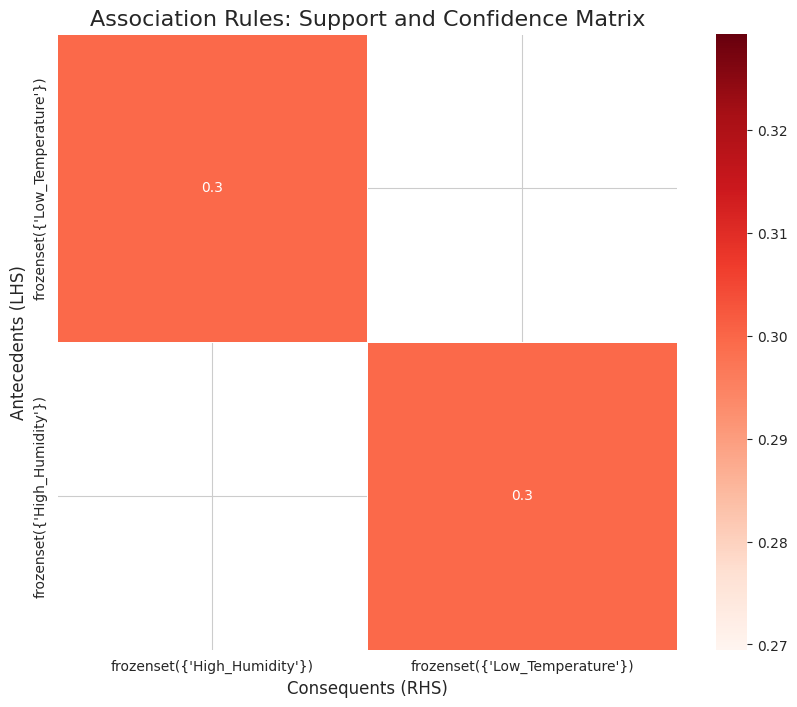

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'transactional_data' is already prepared and 'rules' are generated

# If 'rules' is already generated, we use it directly
# Otherwise, regenerate rules if needed using apriori and association_rules from mlxtend

# Select top 15 rules to visualize
top_rules = rules.nlargest(15, 'confidence')

# Create a matrix plot similar to the one you've shown
plt.figure(figsize=(10, 8))

# Create a pivot table where LHS and RHS of the rules are shown on the axes
pivot_table = pd.pivot_table(
    top_rules,
    values='support',  # Use support for the size of the circles
    index='antecedents',  # Antecedents on y-axis
    columns='consequents',  # Consequents on x-axis
    aggfunc='mean'  # Aggregate support
)

# Generate the plot (circle size = support, color intensity = confidence)
ax = sns.heatmap(pivot_table, annot=True, cmap='Reds', linewidths=0.5)

plt.title("Association Rules: Support and Confidence Matrix", size=16)
plt.xlabel("Consequents (RHS)", size=12)
plt.ylabel("Antecedents (LHS)", size=12)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


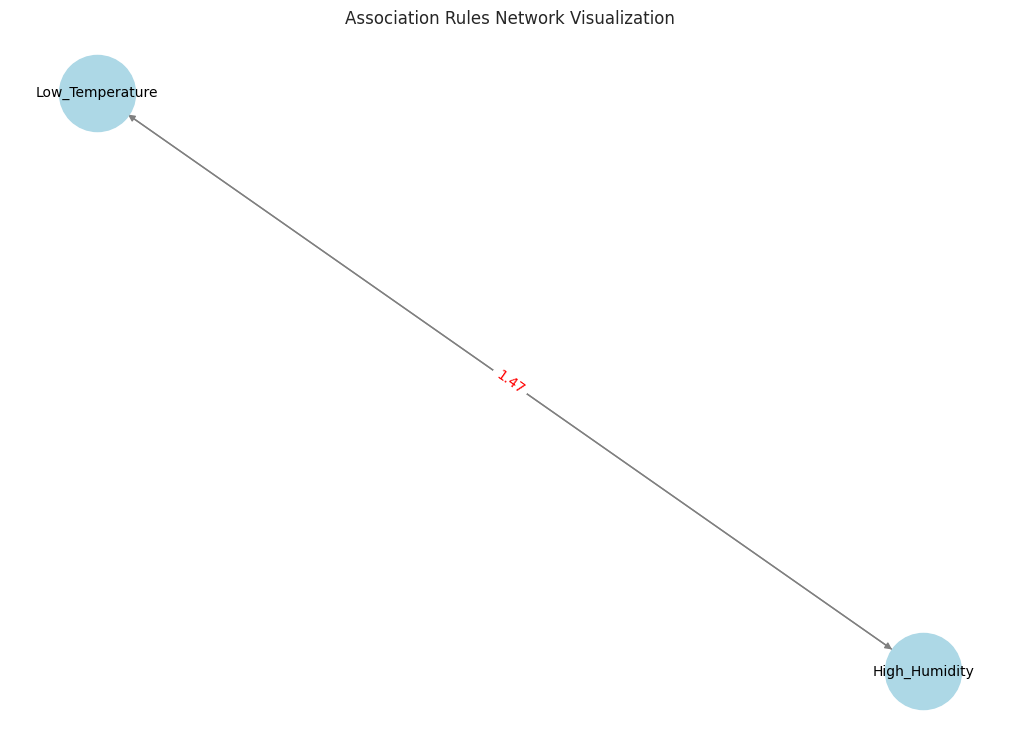

In [ ]:


# Visualize the Top Rules Using a Network Graph

G = nx.DiGraph()

for idx, rule in top_lift_rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['lift'])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}, font_color='red')
plt.title('Association Rules Network Visualization')
plt.show()



### EDA

In [ ]:
df['Summary'] = cat_df['Summary']
numeric_columns_eda = [
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),High_Humidity,Low_Temperature,Strong_Wind
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000,96429.000000,96429.000000,96429.000000
mean,11.930651,10.852091,0.734944,10.658625,187.497506,10.347225,0.0,1016.558794,0.458887,0.442885,0.211492
std,9.547466,10.694501,0.195329,6.443128,107.376423,4.192548,0.0,7.725942,0.498309,0.496730,0.408369
min,-16.550000,-22.480556,0.165000,0.000000,0.000000,0.000000,0.0,998.115000,0.000000,0.000000,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,0.000000,0.000000,0.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,0.000000,0.000000,0.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,1.000000,1.000000,0.000000
max,39.905556,39.344444,1.000000,26.597200,359.000000,16.100000,0.0,1034.875000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96429 non-null  object 
 1   Summary                   96429 non-null  object 
 2   Precip Type               96429 non-null  object 
 3   Temperature (C)           96429 non-null  float64
 4   Apparent Temperature (C)  96429 non-null  float64
 5   Humidity                  96429 non-null  float64
 6   Wind Speed (km/h)         96429 non-null  float64
 7   Wind Bearing (degrees)    96429 non-null  float64
 8   Visibility (km)           96429 non-null  float64
 9   Loud Cover                96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
 11  Daily Summary             96429 non-null  object 
 12  High_Humidity             96429 non-null  int64  
 13  Low_Temperature           96429 non-null  int64  
 14  Strong

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install windrose

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


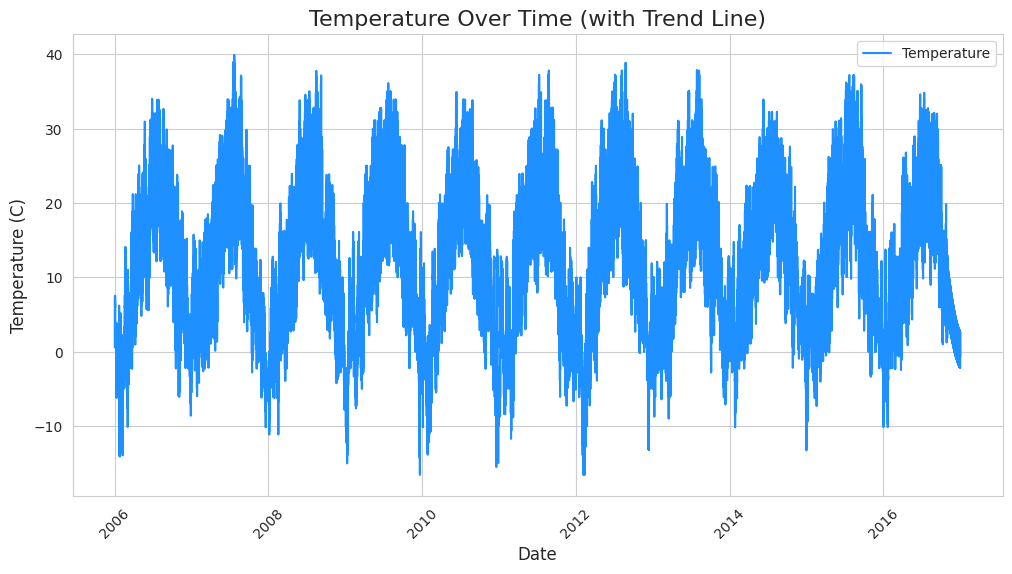

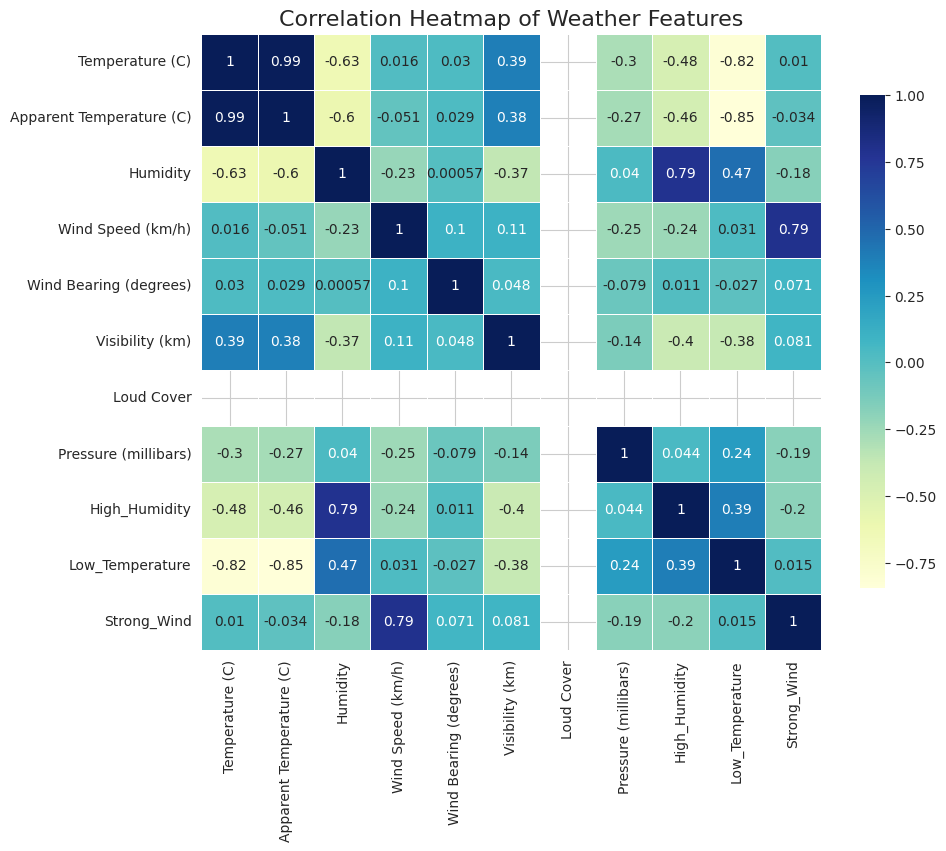

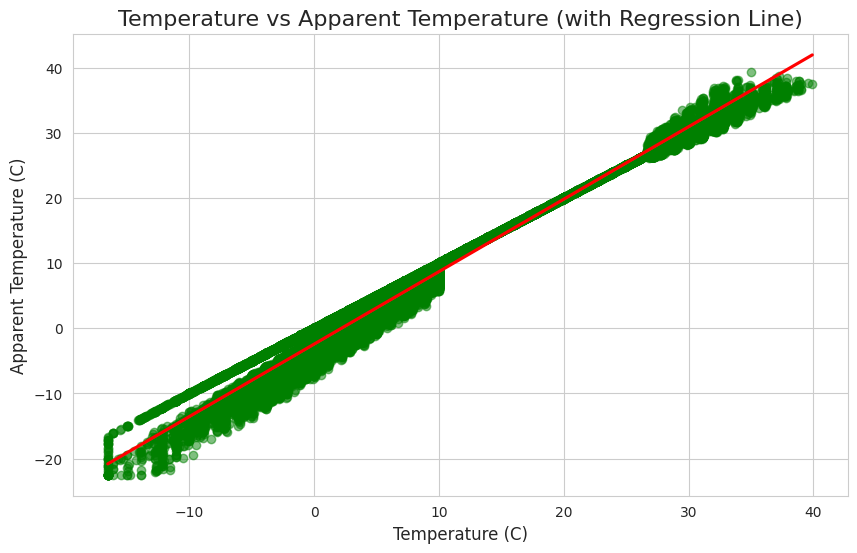

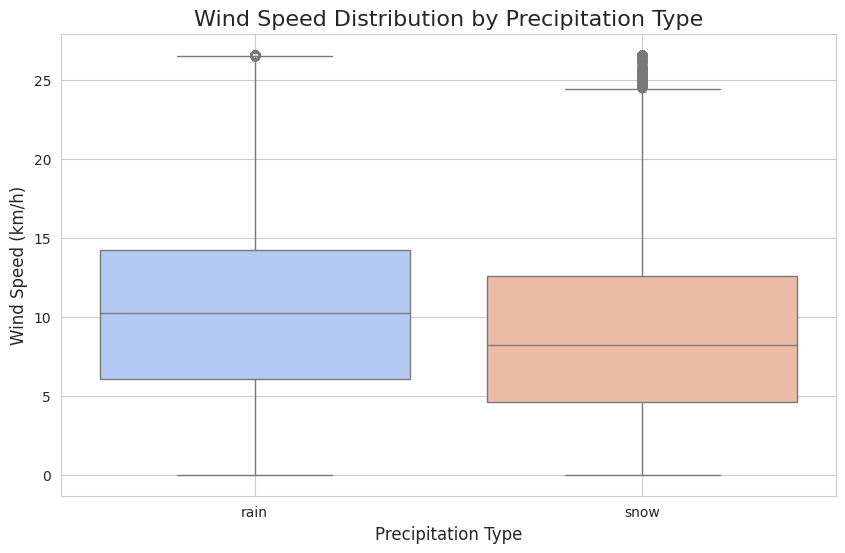

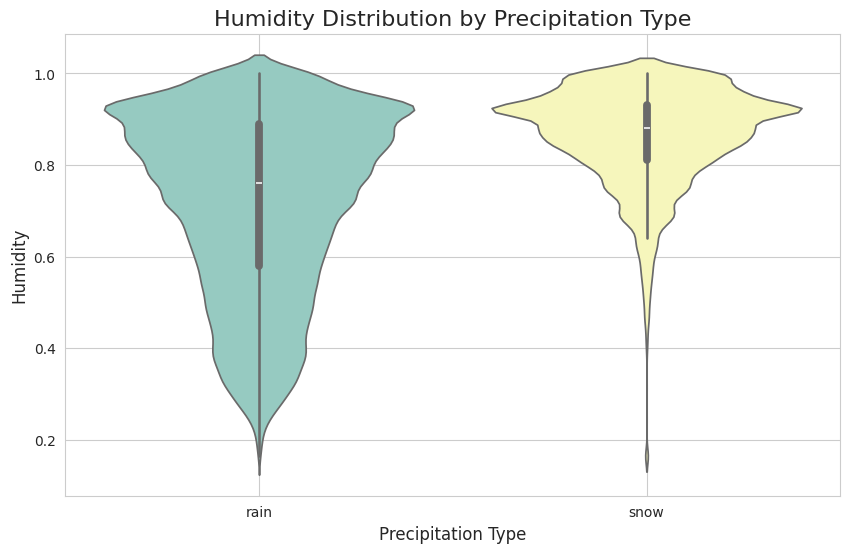

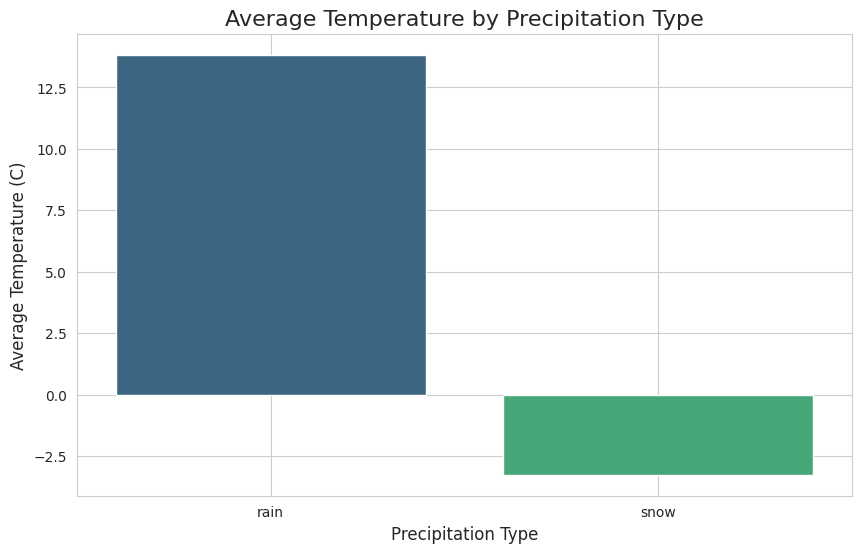

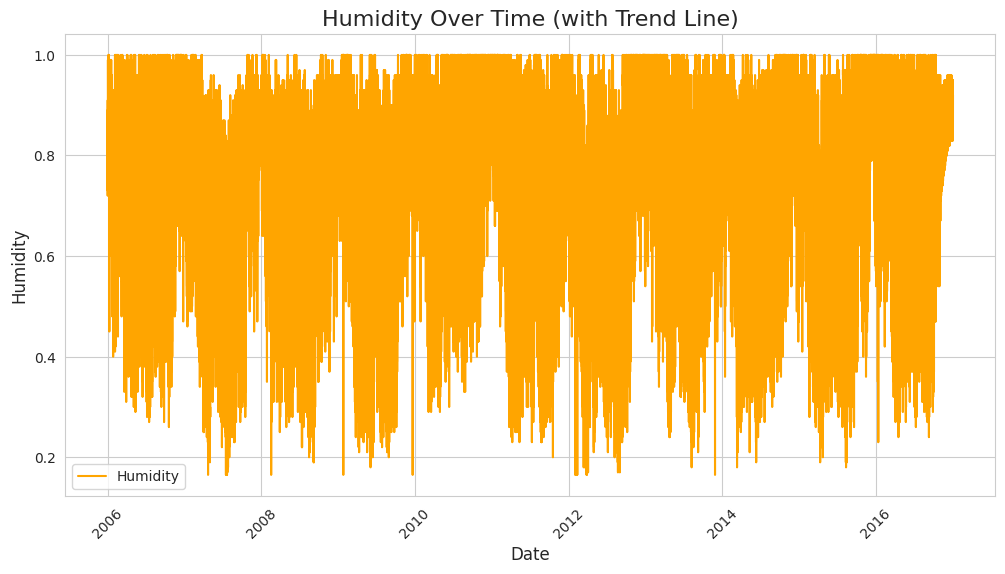

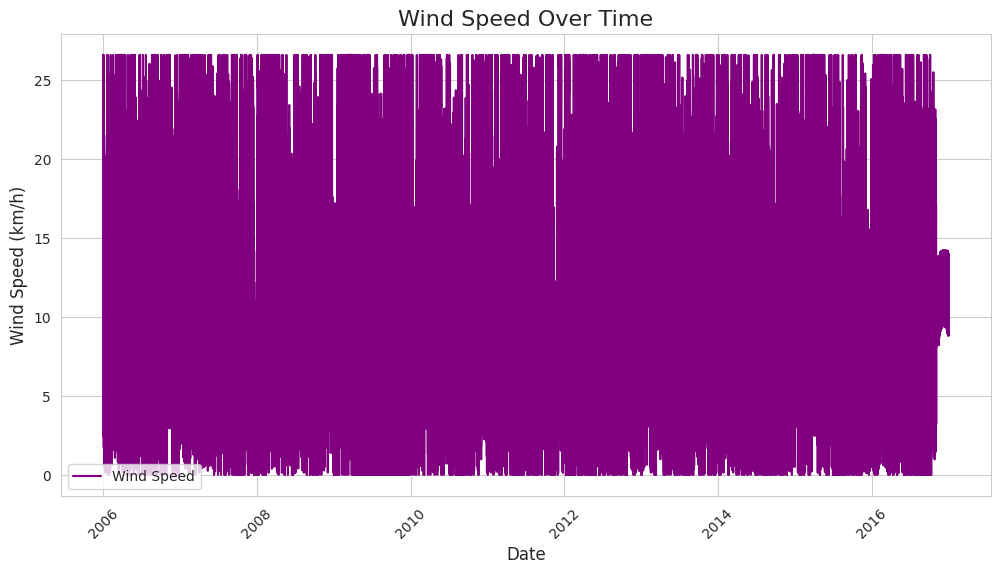

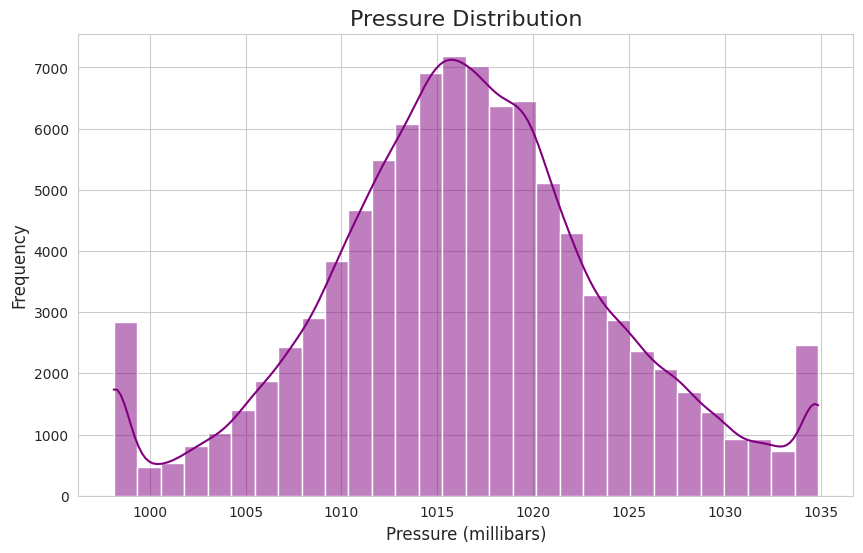

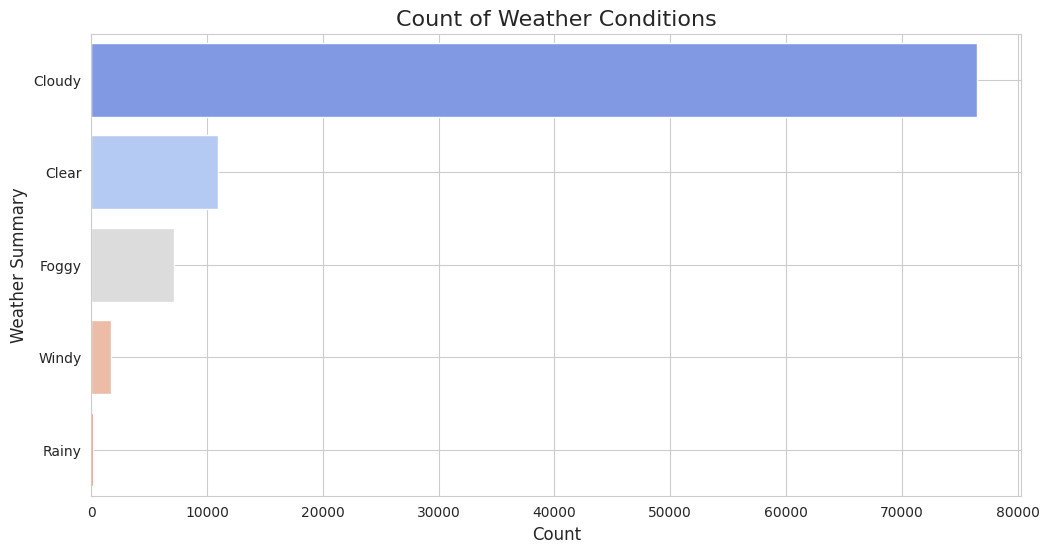

<ipython-input-62-4428827e0add>:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


<Figure size 800x800 with 0 Axes>

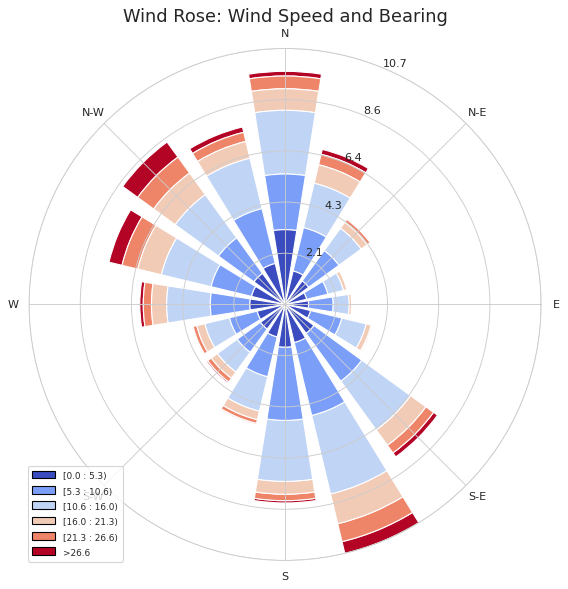

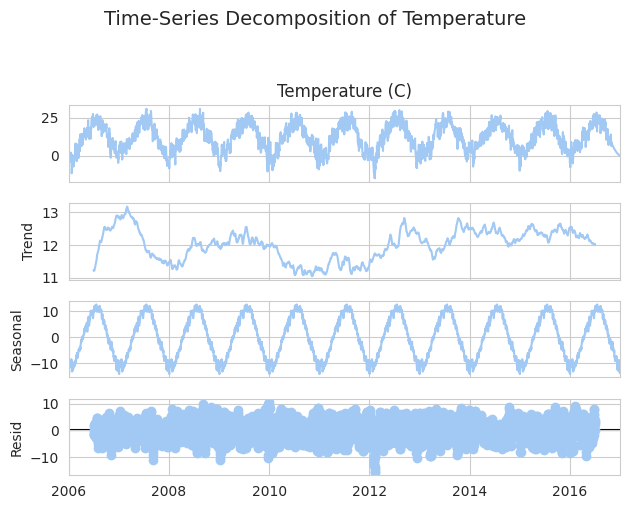

<Figure size 1000x600 with 0 Axes>

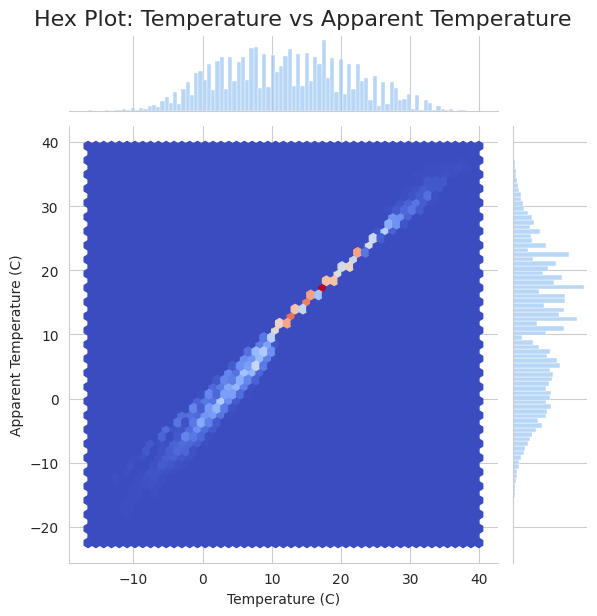

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True).dt.tz_localize(None)
df = df.set_index('Formatted Date')
df = df.drop_duplicates()

# 1. Enhanced Time Series: Temperature Over Time with Trend Line
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Temperature (C)'], color='dodgerblue', label='Temperature')
plt.title('Temperature Over Time (with Trend Line)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 2. Enhanced Correlation Heatmap with better color and labeling
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Weather Features', fontsize=16)
plt.show()

# 3. Scatter Plot with Regression Line: Temperature vs Apparent Temperature
plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature (C)', y='Apparent Temperature (C)', data=df, color='green', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Temperature vs Apparent Temperature (with Regression Line)', fontsize=16)
plt.xlabel('Temperature (C)', fontsize=12)
plt.ylabel('Apparent Temperature (C)', fontsize=12)
plt.grid(True)
plt.show()

# 4. Box Plot: Wind Speed Distribution by Precipitation Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Precip Type', y='Wind Speed (km/h)', data=df, palette='coolwarm')
plt.title('Wind Speed Distribution by Precipitation Type', fontsize=16)
plt.xlabel('Precipitation Type', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.grid(True)
plt.show()

# 5. Enhanced Violin Plot: Humidity by Precipitation Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Precip Type', y='Humidity', data=df, palette='Set3')
plt.title('Humidity Distribution by Precipitation Type', fontsize=16)
plt.xlabel('Precipitation Type', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.grid(True)
plt.show()

# 6. Bar Plot: Average Temperature by Precipitation Type
plt.figure(figsize=(10, 6))
average_temp_by_precip = df.groupby('Precip Type')['Temperature (C)'].mean().reset_index()
sns.barplot(x='Precip Type', y='Temperature (C)', data=average_temp_by_precip, palette='viridis')
plt.title('Average Temperature by Precipitation Type', fontsize=16)
plt.xlabel('Precipitation Type', fontsize=12)
plt.ylabel('Average Temperature (C)', fontsize=12)
plt.grid(True)
plt.show()

# 7. Time Series: Humidity Over Time with Smoother Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Humidity'], color='orange', label='Humidity')
plt.title('Humidity Over Time (with Trend Line)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 8. Line Plot: Wind Speed Over Time with smooth trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Wind Speed (km/h)'], color='purple', label='Wind Speed')
plt.title('Wind Speed Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 9. Histogram: Pressure Distribution with styling
plt.figure(figsize=(10, 6))
sns.histplot(df['Pressure (millibars)'], bins=30, color='purple', kde=True)
plt.title('Pressure Distribution', fontsize=16)
plt.xlabel('Pressure (millibars)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# 10. Count Plot: Weather Summary Count (with enhanced aesthetics)
plt.figure(figsize=(12, 6))
sns.countplot(y='Summary', data=df, order=df['Summary'].value_counts().index, palette='coolwarm')
plt.title('Count of Weather Conditions', fontsize=16)
plt.ylabel('Weather Summary', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.grid(True)
plt.show()

# 11. Wind Rose Plot (if you have windrose library installed)
# """
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Wind Rose Plot (fixing the cmap error)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
cmap = cm.get_cmap('coolwarm')
ax.bar(df['Wind Bearing (degrees)'], df['Wind Speed (km/h)'],
       normed=True, opening=0.8, edgecolor='white', cmap=cmap)
ax.set_legend()
plt.title('Wind Rose: Wind Speed and Bearing', fontsize=16)
plt.show()

# """

# 12. Time-Series Decomposition of Temperature (with title adjustment)
daily_temp = df['Temperature (C)'].resample('D').mean()
decomposition = sm.tsa.seasonal_decompose(daily_temp.dropna(), model='additive', period=365)
decomposition.plot()

plt.suptitle('Time-Series Decomposition of Temperature', fontsize=14, y=1.05)
plt.tight_layout()  # This adjusts the layout to prevent overlap
plt.show()

# 13. Joint Hex Plot: Temperature vs Apparent Temperature
plt.figure(figsize=(10, 6))
sns.jointplot(x='Temperature (C)', y='Apparent Temperature (C)', data=df, kind='hex', cmap='coolwarm')
plt.suptitle('Hex Plot: Temperature vs Apparent Temperature', y=1.02, fontsize=16)
plt.show()


### PCA

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
data = {
    'temperature': np.random.normal(20, 5, 1000),  # Average temp of 20C with some variation
    'humidity': np.random.normal(50, 20, 1000),  # Average humidity of 50% with variation
    'wind_speed': np.random.normal(10, 5, 1000)  # Average wind speed of 10km/h with variation
}
df = pd.DataFrame(data)
# original dataset (before PCA)
print("Original Dataset:")
df.head()


Original Dataset:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,temperature,humidity,wind_speed
0,28.820262,61.119254,2.335395
1,22.000786,67.849478,1.440149
2,24.893690,41.553704,10.230675
3,31.204466,52.094281,5.208128
4,29.337790,54.561067,9.595942


In [ ]:

# Normalize the data using StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)
data_normalized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 1.83307829,  0.56018194, -1.55294657],
       [ 0.4512654 ,  0.90776004, -1.74060609],
       [ 1.0374471 , -0.45026831,  0.10204581],
       ...,
       [ 0.14128098,  0.14957952, -0.14796473],
       [-1.11683607, -1.19352006, -1.21713308],
       [-0.31696743, -1.3681492 , -0.03078234]])

In [ ]:
print("\nNormalized Dataset:")
df_normalized = pd.DataFrame(data_normalized, columns=df.columns)
display(df_normalized.head())


Normalized Dataset:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,temperature,humidity,wind_speed
0,1.833078,0.560182,-1.552947
1,0.451265,0.907760,-1.740606
2,1.037447,-0.450268,0.102046
3,2.316183,0.094093,-0.950770
4,1.937944,0.221489,-0.031006


In [ ]:

# Perform PCA with 2 components
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_normalized)

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_normalized)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


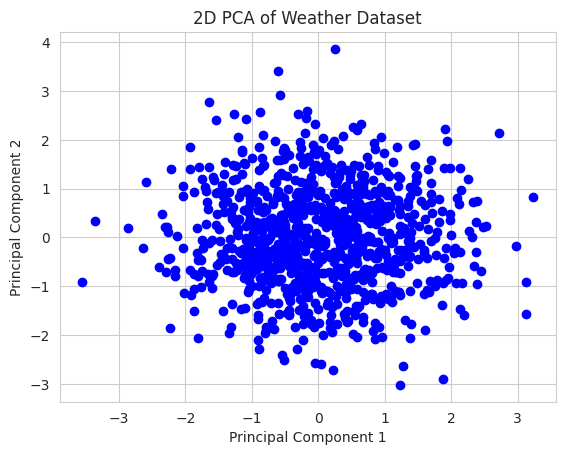

In [ ]:

# Visualize the 2D PCA result
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c='blue')
plt.title('2D PCA of Weather Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


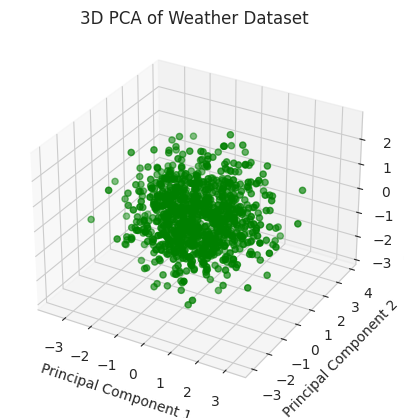

In [ ]:
# Visualize the 3D PCA result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c='green')
ax.set_title('3D PCA of Weather Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [ ]:

# Calculate the explained variance for 2 and 3 components
explained_variance_2d = pca_2d.explained_variance_ratio_
cumulative_variance_2d = explained_variance_2d.cumsum()

explained_variance_3d = pca_3d.explained_variance_ratio_
cumulative_variance_3d = explained_variance_3d.cumsum()

print(f"Cumulative variance for 2 components: {cumulative_variance_2d}")
print(f"Cumulative variance for 3 components: {cumulative_variance_3d}")


Cumulative variance for 2 components: [0.34960188 0.68314696]
Cumulative variance for 3 components: [0.34960188 0.68314696 1.        ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


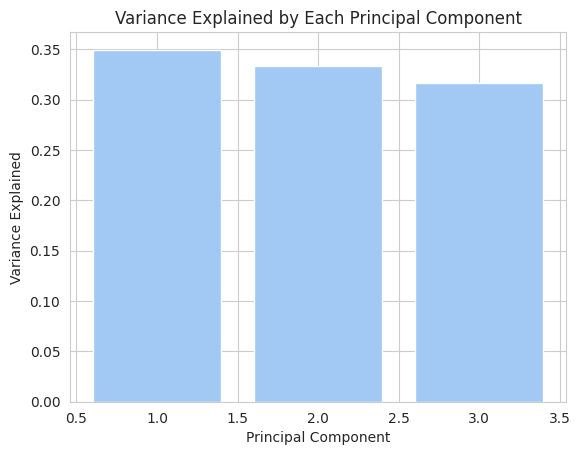

In [ ]:

# Create a scree plot (variance explained by each principal component)
plt.figure()
plt.bar(range(1, len(explained_variance_3d)+1), explained_variance_3d)
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [ ]:

# Apply PCA to retain at least 95% of the variance
pca_95 = PCA(n_components=0.95)
data_pca_95 = pca_95.fit_transform(data_normalized)
n_components_95 = pca_95.n_components_
print(f"Number of components to retain 95% of the variance: {n_components_95}")


Number of components to retain 95% of the variance: 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Extract and print the top 3 eigenvalues (explained variance) for the first three components
eigenvalues = pca_3d.explained_variance_
print(f"Top 3 eigenvalues: {eigenvalues[:3]}")

Top 3 eigenvalues: [1.04985551 1.00163686 0.95151064]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


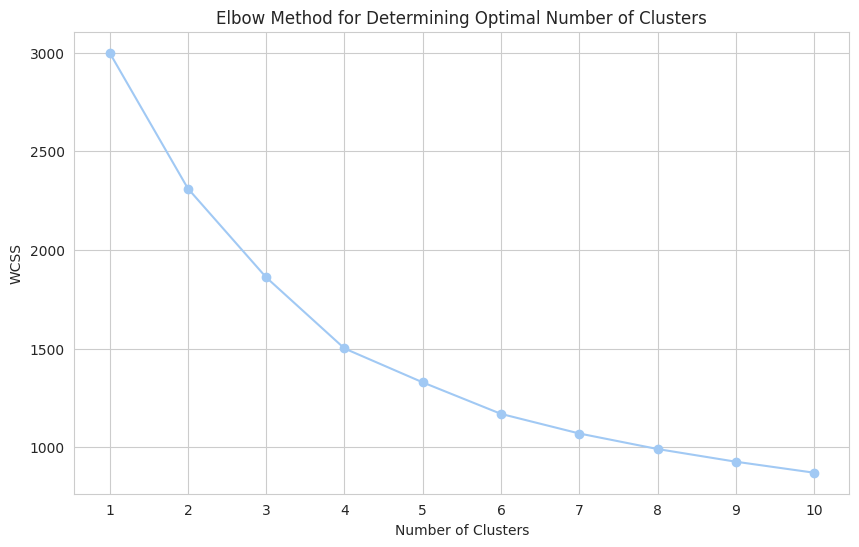

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(0)
data = {
    'temperature': np.random.normal(20, 5, 1000),
    'humidity': np.random.normal(50, 20, 1000),
    'wind_speed': np.random.normal(10, 5, 1000)
}
df = pd.DataFrame(data)


scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)


df['Cluster'] = cluster_labels

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


         temperature   humidity  wind_speed
Cluster                                    
0          24.544313  45.852918    6.933951
1          15.432184  53.518884    7.180011
2          19.770790  51.002796   14.551912


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


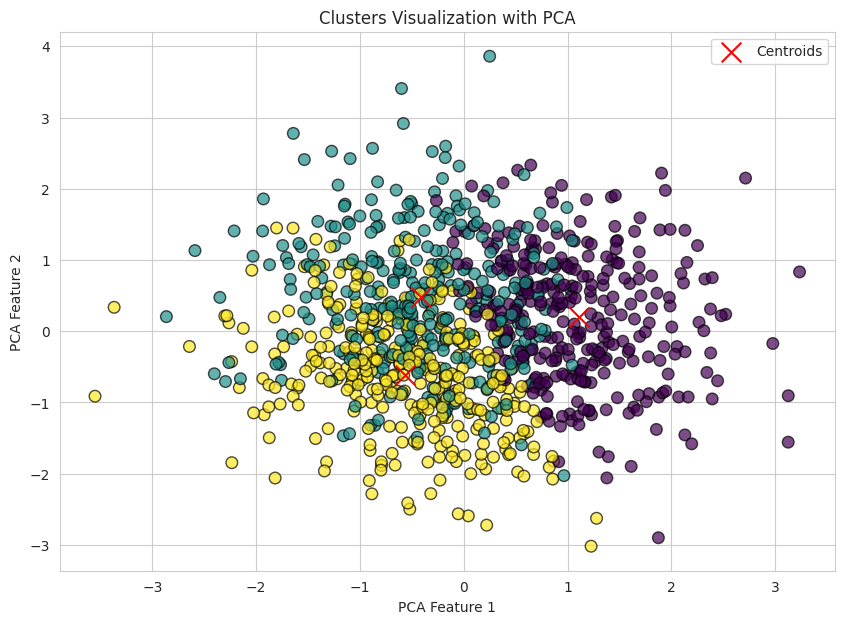

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.7)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

features = df[['temperature', 'humidity', 'wind_speed']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


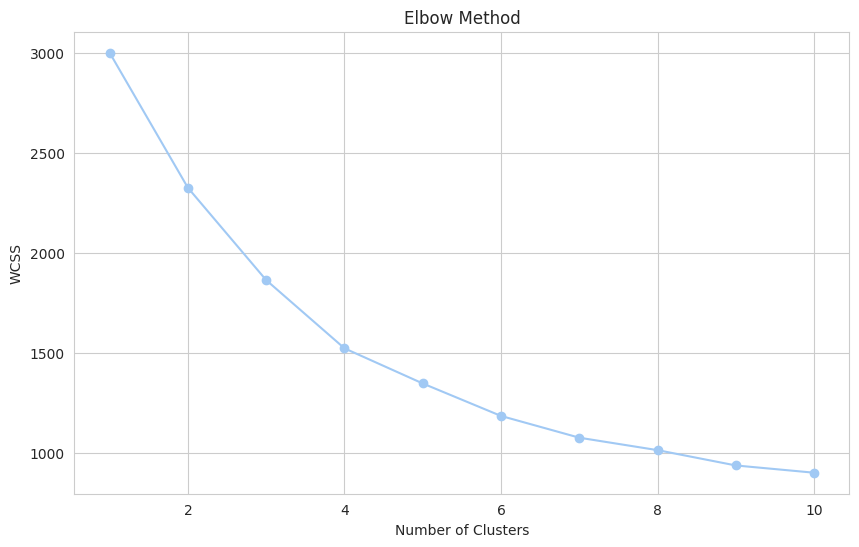

In [ ]:
# Elbow Method for optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster_Label'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score for 3 clusters: 0.224


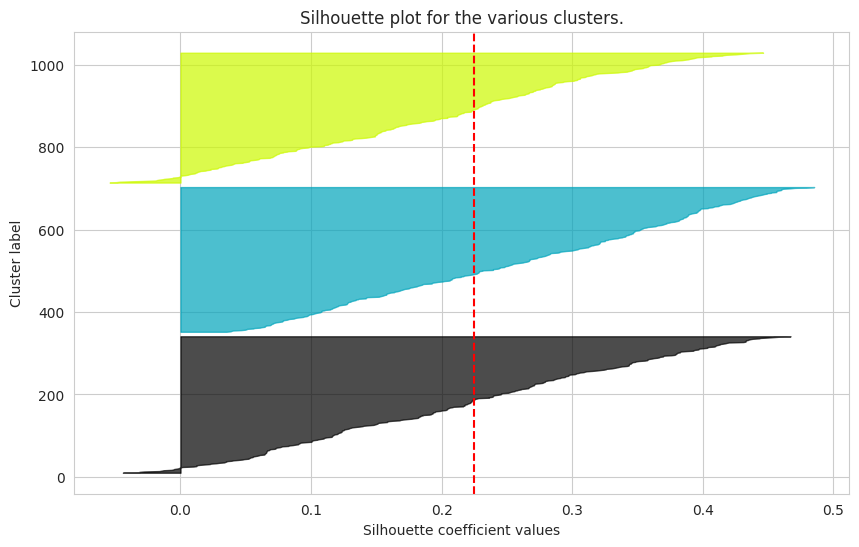

In [ ]:
silhouette_avg = silhouette_score(features_scaled, df['Cluster_Label'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.3f}')

sample_silhouette_values = silhouette_samples(features_scaled, df['Cluster_Label'])

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster_Label'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / optimal_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
plt.title('Silhouette plot for the various clusters.')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


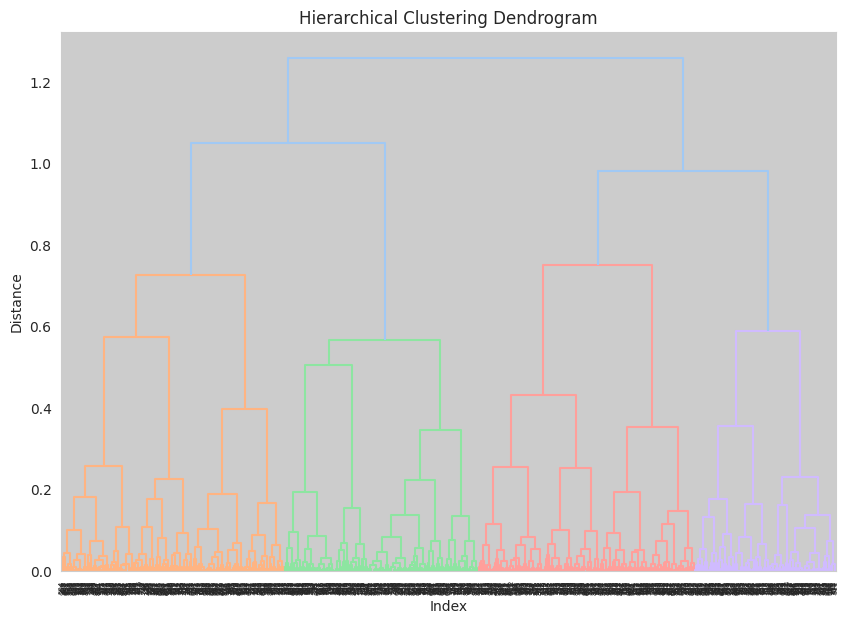

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(features_scaled)
linkage_matrix = linkage(cosine_sim_matrix, method='average', metric='cosine')


plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


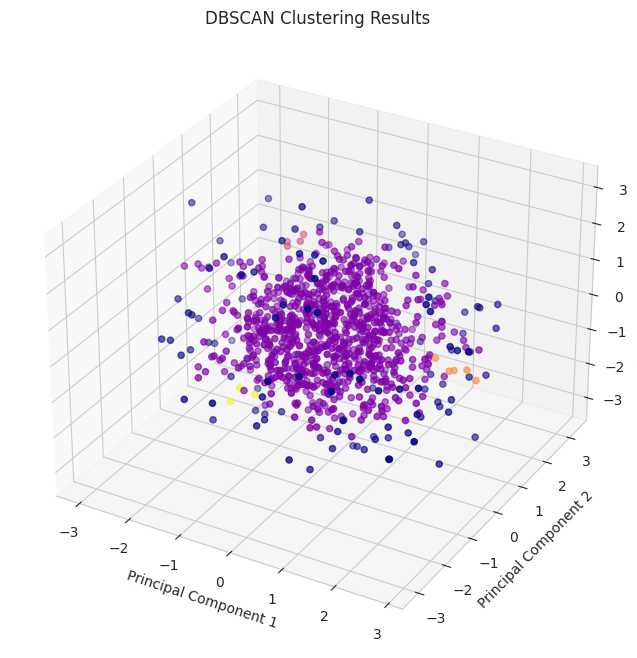

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(features_scaled)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2], c=db_labels, cmap='plasma', marker='o')

ax.set_title('DBSCAN Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()